In [25]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

In [26]:
# !kaggle datasets download -d adityakadiwal/water-potability

In [27]:
# import zipfile
# zip_rec = zipfile.ZipFile('/content/water-potability.zip','r')
# zip_rec.extractall('data/')
# zip_rec.close()

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
water = pd.read_csv(r'C:\Users\Aniket Arya\Downloads\Compressed\archive_3\water_potability.csv') 

In [30]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



The water_potability.csv file contains water quality metrics for 3276 different water bodies.

### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

### 8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than 0the WHO recommended value of 5.00 NTU.

### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [31]:
water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1540,7.606880,183.840100,29339.929268,5.703617,259.534719,426.985942,14.006983,91.590703,4.564460,1
279,6.286807,258.300052,13777.376191,7.483258,328.680650,563.434775,16.460837,73.516654,4.104863,1
2579,6.891549,184.074628,13376.680472,6.866435,333.802475,508.681145,16.586205,81.712849,4.958937,0
241,7.810145,187.315048,20418.889926,7.214896,325.228881,351.186081,16.800400,68.485480,4.033774,0
202,8.369154,183.500378,12975.900334,6.600853,315.901122,493.465440,12.987106,87.029410,3.629749,0


In [32]:
print(f'shape of  dataset {water.shape[0],water.shape[-1]}')

shape of  dataset (3276, 10)


## sort view  of columns of dataset

In [33]:
for i in range(len(water.columns)):
  print(water.columns[i])

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability


In [34]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [35]:
water_null=water.isnull().sum()

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

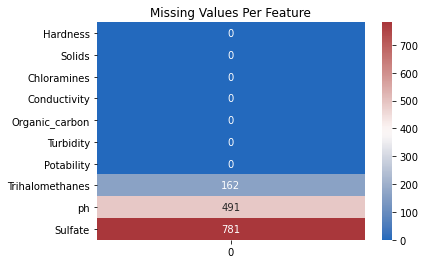

In [36]:
plt.title('Missing Values Per Feature')
nans = water.isna().sum().sort_values(ascending=True).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')


In [37]:
water.describe().T.style.bar(subset=['mean'],color='Reds').background_gradient(subset='std',cmap='ocean').background_gradient(subset=['50%'],cmap='plasma').background_gradient(subset=['max'],cmap=None)

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# outliers of the dataset

In [38]:
def outlier_check(var):
    sns.displot(data = water,x=var )
    print(" ")
    print("Variable : ",var)
    print("Minimum value :",water[var].min())
    print("1st percentile :",water[var].quantile(0.01))
    print("99th percentitle :",water[var].quantile(0.99))
    print("Maximum value :",water[var].max())

 
Variable :  ph
Minimum value : 0.0
1st percentile : 3.406796621104784
99th percentitle : 10.895339401159859
Maximum value : 13.999999999999998
 
Variable :  Hardness
Minimum value : 47.432
1st percentile : 114.23636579883768
99th percentitle : 278.062602333034
Maximum value : 323.124
 
Variable :  Solids
Minimum value : 320.942611274359
1st percentile : 5416.238724468493
99th percentitle : 45974.10648980326
Maximum value : 61227.19600771213
 
Variable :  Chloramines
Minimum value : 0.3520000000000003
1st percentile : 3.2030819022911725
99th percentitle : 10.967152881398318
Maximum value : 13.127000000000002
 
Variable :  Sulfate
Minimum value : 129.00000000000003
1st percentile : 232.4993381817557
99th percentitle : 434.02199054504706
Maximum value : 481.0306423059972
 
Variable :  Conductivity
Minimum value : 181.483753985146
1st percentile : 269.4229472311401
99th percentitle : 617.6265581538769
Maximum value : 753.3426195583046
 
Variable :  Organic_carbon
Minimum value : 2.199999

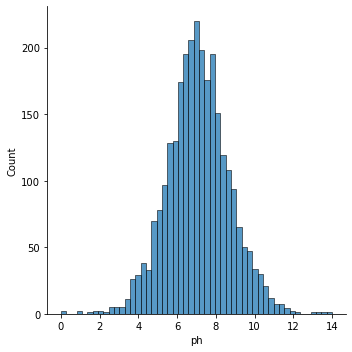

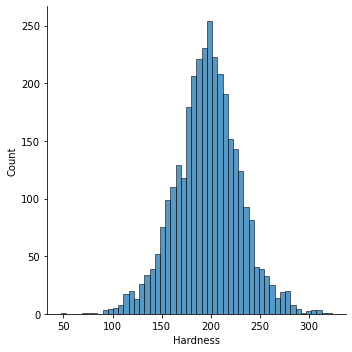

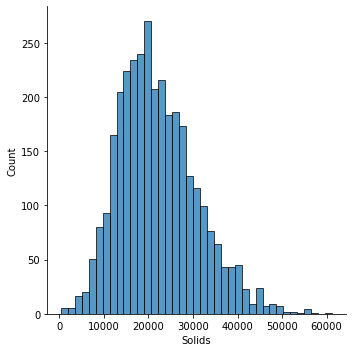

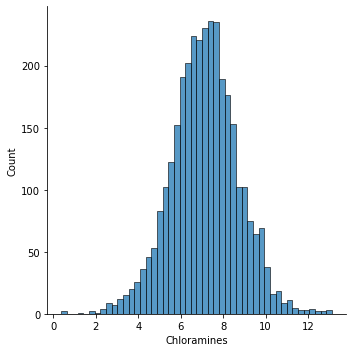

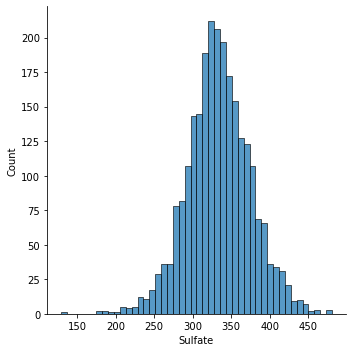

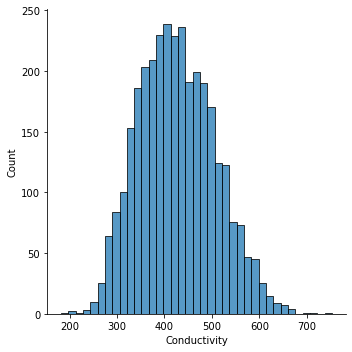

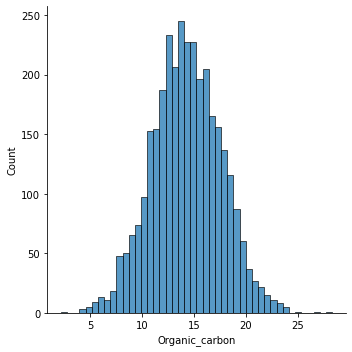

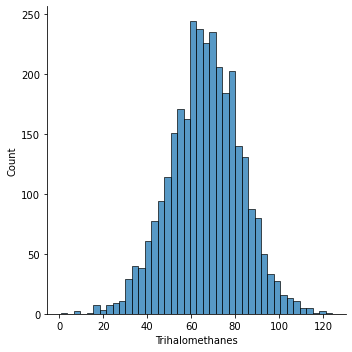

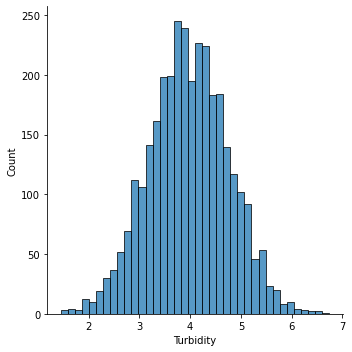

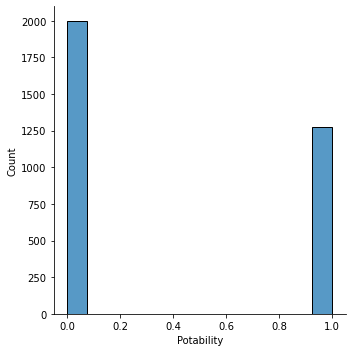

In [39]:
for i in range(len(water.columns)):
  outlier_check(water.columns[i])

In [40]:
def outlier_treatment(var,min_treat,max_treat):
    min = water[var].quantile(0.01)
    max = water[var].quantile(0.99)
    if min_treat == 1:
        water.loc[water[var] <= min ,var]= min

    if max_treat == 1:
        water.loc[water[var] >= max,var] = max

In [41]:
# for i in range(len(water.columns)):
#   outlier_treatment(water.columns[i],0,1)

C:\Anaconda3\envs\scikit_learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
   Count  Percentage
0   1998       60.99
1   1278       39.01


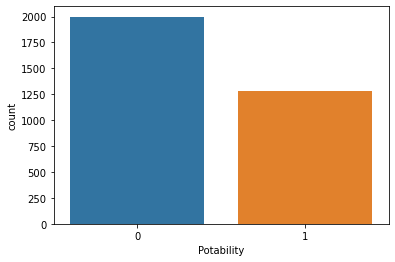

In [42]:
sns.countplot(water['Potability'])
print(pd.concat([water['Potability'].value_counts(),water['Potability'].value_counts(normalize=True).mul(100).round(2)],axis=1,keys=('Count','Percentage')))

Text(0.5, 1.0, 'Features Correlating with Target')

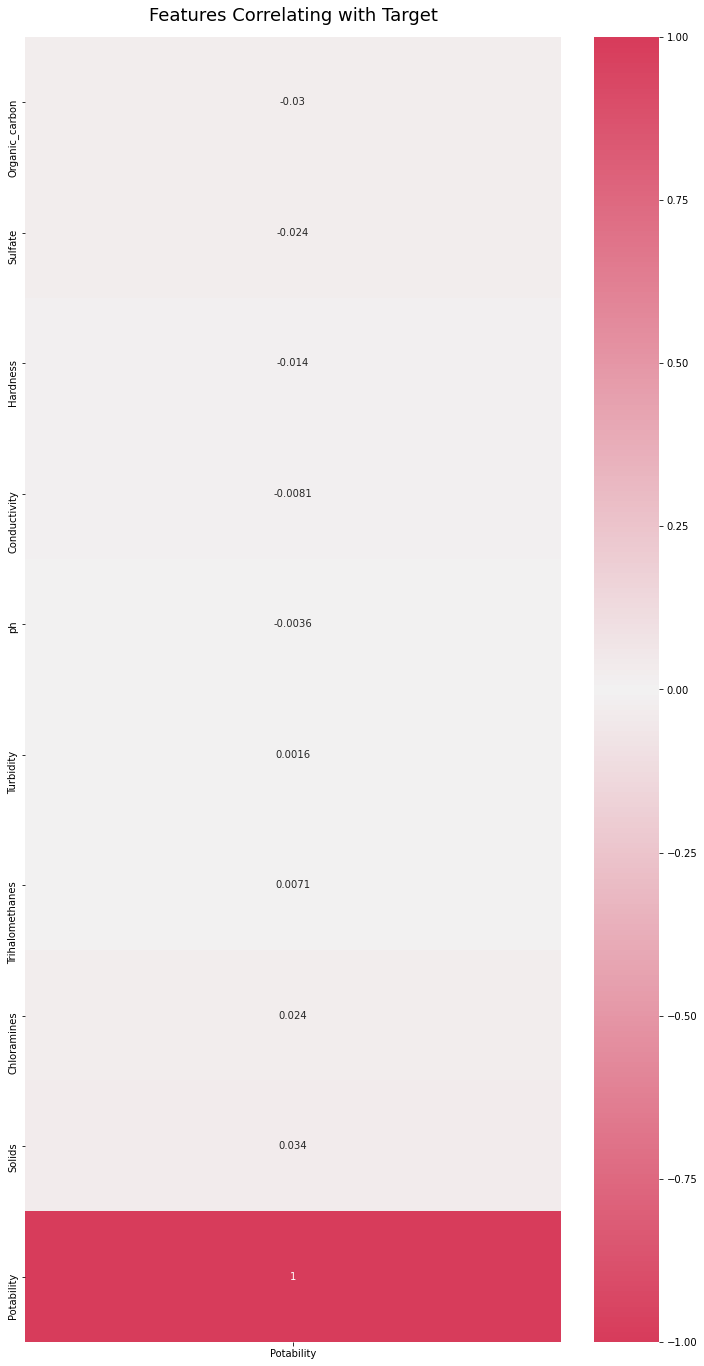

In [43]:



plt.figure(figsize=(12, 24))
heatmap = sns.heatmap(water.corr()[['Potability']].sort_values(by='Potability', ascending=True), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap=sns.diverging_palette(5, 5, as_cmap=True))
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16)

In [44]:
low_corr_vars =['Trihalomethanes','Turbidity','ph','Conductivity','Sulfate']
water.drop(low_corr_vars,axis=1,inplace=True)

In [45]:
water.head()

,Hardness,Solids,Chloramines,Organic_carbon,Potability
0,204.890455,20791.318981,7.300212,10.379783,0
1,129.422921,18630.057858,6.635246,15.180013,0
2,224.236259,19909.541732,9.275884,16.868637,0
3,214.373394,22018.417441,8.059332,18.436524,0
4,181.101509,17978.986339,6.546600,11.558279,0


In [46]:
water.isnull().sum()

Hardness          0
Solids            0
Chloramines       0
Organic_carbon    0
Potability        0
dtype: int64

In [47]:
corr_water = water.drop(['Potability'],axis=1)
corrmat = corr_water.corr()

<AxesSubplot:>

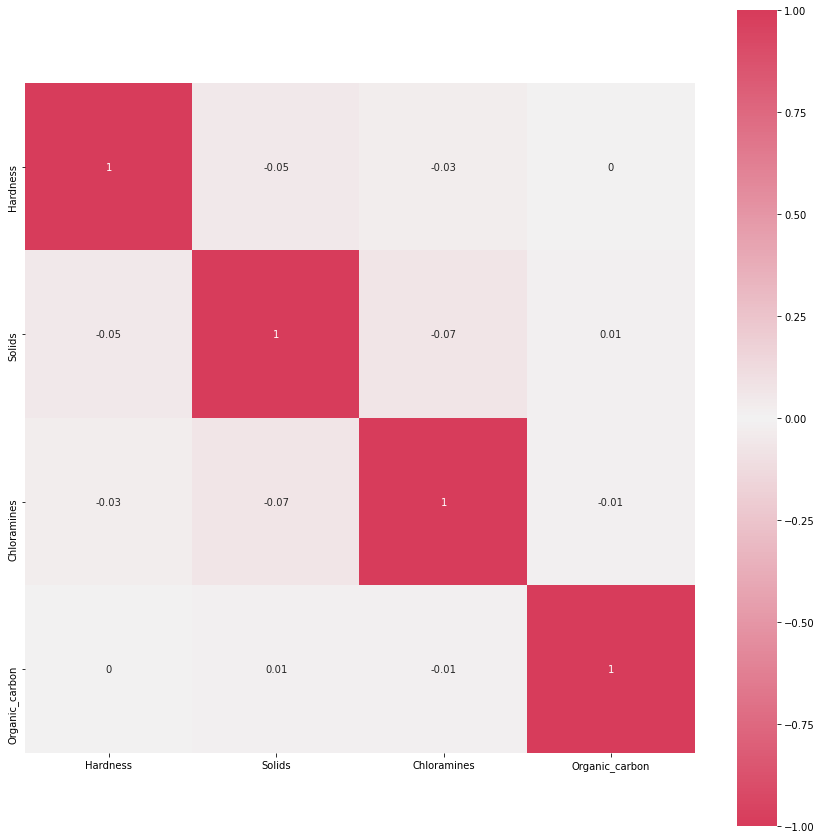

In [48]:
f , ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat.round(2),vmin=-1,vmax=1,square=True,annot=True,cmap=sns.diverging_palette(5,5,as_cmap=True))

In [49]:
X =  water.drop('Potability',axis=1)
y =  water['Potability']

In [50]:

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
print('Train data records : %d\nTest data records :%d'%(X_train.shape[0] ,X_test.shape[0]))

Train data records : 2293
Test data records :983


In [52]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
train_predictions = logistic_model.predict(X_train)
test_predictions = logistic_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
model_performance = pd.DataFrame([['LogisticRegression',round(accuracy_score(y_train,train_predictions)*100,2),round(accuracy_score(y_test,test_predictions)*100,2)]],columns=['Model','Train_Accuracy','Test_Accuracy'])

In [56]:
print(model_performance)

                Model  Train_Accuracy  Test_Accuracy
0  LogisticRegression           61.62          59.51


In [57]:
def dt_score(max_leaf_nodes, X_train, y_train,X_test,y_test):
    model = DecisionTreeClassifier(max_leaf_nodes= max_leaf_nodes,random_state=1)
    model.fit(X_train,y_train)
    train_predict= model.predict(X_train)
    test_predict = model.predict(X_test)
    ac_score_train = round(accuracy_score(y_train,train_predict)*100,2)
    ac_score_test = round(accuracy_score(y_test,test_predict)*100,2)
    return(ac_score_train,ac_score_test)

In [58]:
dt_score_results = pd.DataFrame(columns=['Max_leaf_nodes','Train_Accuracy','Test_Accuracy'])
for max_leaf_nodes in [2,3,4,5,10,20,30,40,50]:
    ac_score_train,ac_score_test = dt_score(max_leaf_nodes,X_train,y_train,X_test,y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, ac_score_train, ac_score_test))

Max leaf nodes: 2  	 Train Accuracy:  61.62 	 Test Accuracy 59.51
Max leaf nodes: 3  	 Train Accuracy:  61.97 	 Test Accuracy 59.61
Max leaf nodes: 4  	 Train Accuracy:  62.28 	 Test Accuracy 59.41
Max leaf nodes: 5  	 Train Accuracy:  62.54 	 Test Accuracy 59.10
Max leaf nodes: 10  	 Train Accuracy:  63.19 	 Test Accuracy 59.41
Max leaf nodes: 20  	 Train Accuracy:  64.54 	 Test Accuracy 59.82
Max leaf nodes: 30  	 Train Accuracy:  65.85 	 Test Accuracy 60.12
Max leaf nodes: 40  	 Train Accuracy:  67.77 	 Test Accuracy 60.33
Max leaf nodes: 50  	 Train Accuracy:  68.91 	 Test Accuracy 60.53


In [59]:
decision_tree_model = DecisionTreeClassifier(max_leaf_nodes=50,random_state=1)
decision_tree_model.fit(X_train,y_train)
train_prediction = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)
model_performance = model_performance.append(pd.DataFrame([['DecisionTreeClassifier',round(accuracy_score(y_train,train_predictions)*100,2),round(accuracy_score(y_test,test_predictions)*100,2)]],columns=['Model','Train_Accuracy','Test_Accuracy']),ignore_index=True)
print(model_performance)

                    Model  Train_Accuracy  Test_Accuracy
0      LogisticRegression           61.62          59.51
1  DecisionTreeClassifier           61.62          60.53


In [60]:
def rf_score(max_leaf_nodes, X_train, y_train,X_test,y_test):
    model = RandomForestClassifier(max_leaf_nodes= max_leaf_nodes,random_state=1)
    model.fit(X_train,y_train)
    train_predict= model.predict(X_train)
    test_predict = model.predict(X_test)
    ac_score_train = round(accuracy_score(y_train,train_predict)*100,2)
    ac_score_test = round(accuracy_score(y_test,test_predict)*100,2)
    return(ac_score_train,ac_score_test)

In [61]:
rf_score_results = pd.DataFrame(columns=['Max_leaf_nodes','Train_Accuracy','Test_Accuracy'])
for max_leaf_nodes in [2,3,4,5,10,20,30,40,50]:
    ac_score_train,ac_score_test = rf_score(max_leaf_nodes,X_train,y_train,X_test,y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, ac_score_train, ac_score_test))

Max leaf nodes: 2  	 Train Accuracy:  61.80 	 Test Accuracy 59.51
Max leaf nodes: 3  	 Train Accuracy:  61.97 	 Test Accuracy 59.72
Max leaf nodes: 4  	 Train Accuracy:  62.10 	 Test Accuracy 60.12
Max leaf nodes: 5  	 Train Accuracy:  62.67 	 Test Accuracy 60.33
Max leaf nodes: 10  	 Train Accuracy:  64.11 	 Test Accuracy 61.14
Max leaf nodes: 20  	 Train Accuracy:  66.11 	 Test Accuracy 61.44
Max leaf nodes: 30  	 Train Accuracy:  68.86 	 Test Accuracy 60.83
Max leaf nodes: 40  	 Train Accuracy:  70.39 	 Test Accuracy 61.24
Max leaf nodes: 50  	 Train Accuracy:  72.61 	 Test Accuracy 60.63


In [62]:
random_forest_model = RandomForestClassifier(max_leaf_nodes=50,random_state=1)
random_forest_model.fit(X_train,y_train)
train_prediction = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)
model_performance = model_performance.append(pd.DataFrame([['RandomForestClassifier',round(accuracy_score(y_train,train_predictions)*100,2),round(accuracy_score(y_test,test_predictions)*100,2)]],columns=['Model','Train_Accuracy','Test_Accuracy']),ignore_index=True)
print(model_performance)

                    Model  Train_Accuracy  Test_Accuracy
0      LogisticRegression           61.62          59.51
1  DecisionTreeClassifier           61.62          60.53
2  RandomForestClassifier           61.62          60.53


In [63]:
def gb_score(max_leaf_nodes, X_train, y_train,X_test,y_test):
    model = GradientBoostingClassifier(max_leaf_nodes= max_leaf_nodes,random_state=1)
    model.fit(X_train,y_train)
    train_predict= model.predict(X_train)
    test_predict = model.predict(X_test)
    ac_score_train = round(accuracy_score(y_train,train_predict)*100,2)
    ac_score_test = round(accuracy_score(y_test,test_predict)*100,2)
    return(ac_score_train,ac_score_test)

In [64]:
gb_score_results = pd.DataFrame(columns=['Max_leaf_nodes','Train_Accuracy','Test_Accuracy'])
for max_leaf_nodes in [2,3,4,5,10,20,30,40,50]:
    ac_score_train,ac_score_test = gb_score(max_leaf_nodes,X_train,y_train,X_test,y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, ac_score_train, ac_score_test))

Max leaf nodes: 2  	 Train Accuracy:  62.67 	 Test Accuracy 60.63
Max leaf nodes: 3  	 Train Accuracy:  65.24 	 Test Accuracy 61.75
Max leaf nodes: 4  	 Train Accuracy:  66.51 	 Test Accuracy 61.14
Max leaf nodes: 5  	 Train Accuracy:  67.77 	 Test Accuracy 60.22
Max leaf nodes: 10  	 Train Accuracy:  69.65 	 Test Accuracy 60.53
Max leaf nodes: 20  	 Train Accuracy:  69.65 	 Test Accuracy 60.53
Max leaf nodes: 30  	 Train Accuracy:  69.65 	 Test Accuracy 60.53
Max leaf nodes: 40  	 Train Accuracy:  69.65 	 Test Accuracy 60.53
Max leaf nodes: 50  	 Train Accuracy:  69.65 	 Test Accuracy 60.53


In [65]:
gb_model = GradientBoostingClassifier(max_leaf_nodes= 10,random_state=1)
gb_model.fit(X_train,y_train)
train_prediction = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)
model_performance = model_performance.append(pd.DataFrame([['GradientBoostingClassifier',round(accuracy_score(y_train,train_predictions)*100,2),round(accuracy_score(y_test,test_predictions)*100,2)]],columns=['Model','Train_Accuracy','Test_Accuracy']),ignore_index=True)
print(model_performance)

                        Model  Train_Accuracy  Test_Accuracy
0          LogisticRegression           61.62          59.51
1      DecisionTreeClassifier           61.62          60.53
2      RandomForestClassifier           61.62          60.53
3  GradientBoostingClassifier           61.62          60.53


Accuracy Score: 60.63 


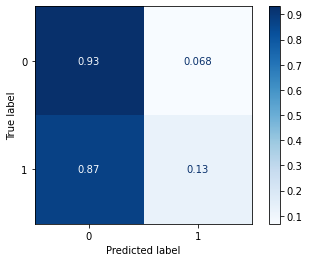

In [66]:
full_predictions = random_forest_model.predict(X_test)
print( "Accuracy Score: %.2f " % (round(accuracy_score(y_test, full_predictions)*100,2)))

# Plotting confusion matrix
plot_confusion_matrix(random_forest_model,
                      X_test, 
                      y_test,
                      cmap=plt.cm.Blues,
                      normalize= 'true')